In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%pip install wandb
!wandb

Note: you may need to restart the kernel to use updated packages.
Usage: wandb [OPTIONS] COMMAND [ARGS]...

Options:
  --version  Show the version and exit.
  --help     Show this message and exit.

Commands:
  agent         Run the W&B agent
  artifact      Commands for interacting with artifacts
  controller    Run the W&B local sweep controller
  disabled      Disable W&B.
  docker        W&B docker lets you run your code in a docker image...
  docker-run    Simple wrapper for `docker run` which adds WANDB_API_KEY...
  enabled       Enable W&B.
  init          Configure a directory with Weights & Biases
  launch        Launch or queue a job from a uri (Experimental).
  launch-agent  Run a W&B launch agent (Experimental)
  local         Launch local W&B container (Experimental)
  login         Login to Weights & Biases
  offline       Disable W&B sync
  online        Enable W&B sync
  pull          Pull files from Weights & Biases
  restore       Restore code, config and docker state

In [7]:
%pip install kaggle --upgrade
!kaggle
import os
fpath = os.path.join(os.path.expanduser("~"), ".kaggle", "kaggle.json")
if not os.path.isfile(fpath):
    with open(fpath, "w") as f:
        f.write(input(f"input {fpath}"))
    !chmod 600 /root/.kaggle/kaggle.json

Note: you may need to restart the kernel to use updated packages.
usage: kaggle [-h] [-v] {competitions,c,datasets,d,kernels,k,config} ...
kaggle: error: the following arguments are required: command


In [4]:
if 'datasets' not in os.listdir(os.getcwd()):
    !kaggle datasets download alessiocorrado99/animals10
    !mkdir datasets
    !unzip animals10.zip -d datasets/animals10
    !rm animals10.zip

In [8]:
import numpy as np
class Dataset:
    def __init__(self, BS, shuffle=True):
        self.BS = BS
        self.XIndex = list()
        self.y = list()
        for i, yi in enumerate(sample_n):
            for xi in range(yi):
                self.y.append(i)
                self.XIndex.append(xi)
        self.XIndex = np.array(self.XIndex)
        self.y = np.array(self.y)
        self.l = len(self.y)
        if shuffle:
            randl = list(range(self.l))
            np.random.shuffle(randl)
            self.XIndex = self.XIndex[randl]
            self.y = self.y[randl]
    def __len__(self):
        return int(np.ceil(self.l/self.BS))
    def __getitem__(self, key):
        start = key * self.BS
        assert start < self.l
        stop = start + self.BS
        if stop > self.l and start < self.l:
            stop = self.l
        return self.XIndex[start:stop], self.y[start:stop]
    def __iter__(self):
        for b in range(len(self)):
            start = b*self.BS
            X, y = self.XIndex[start:start+self.BS], self.y[start:start+self.BS]
            X_path = list()
            for xs, ys in zip(X, y):
                X_path.append(os.path.join(path,class_list[ys],data_paths[ys][xs]))
            X_path = np.array(X_path)
            X_Images = self.toMem(X_path)
            yield X_Images, y
    def toMem(self, X_path):
        from PIL import Image
        X_images = list()
        for img_path in X_path:
            im = Image.open(img_path)
            X_images.append(im)
        return X_images
        
'''
getdata = Dataset(BS=150)
for x_b, y_b in getdata:
    print(type(x_b[0]))
    # print(x_b, y_b, x_b.shape, y_b.shape)
'''

'\ngetdata = Dataset(BS=150)\nfor x_b, y_b in getdata:\n    print(type(x_b[0]))\n    # print(x_b, y_b, x_b.shape, y_b.shape)\n'

In [10]:
import torch
import os
# torch.manual_seed(17)
from torchvision import datasets, transforms
BS = 4
IM_HEIGHT = 425
IM_WIDTH = 600
transform = transforms.Compose([transforms.Resize([IM_HEIGHT, IM_WIDTH]), transforms.ToTensor()])
path = os.path.join(os.getcwd(), "datasets", "animals10", "raw-img")
dataset = datasets.ImageFolder(path, transform=transform)
train_set, val_set = torch.utils.data.random_split(dataset, [int(len(dataset)*0.7), int(len(dataset)*0.3)+1])
train_set_loader = torch.utils.data.DataLoader(train_set, batch_size=BS, shuffle=True)
val_set_loader = torch.utils.data.DataLoader(val_set, batch_size=BS, shuffle=True)

torch.Size([4, 3, 425, 600]) torch.Size([3, 425, 600])
tensor([[0.5569, 0.5608, 0.5647,  ..., 0.5098, 0.5059, 0.5020],
        [0.5608, 0.5647, 0.5686,  ..., 0.5098, 0.5059, 0.5020],
        [0.5647, 0.5686, 0.5725,  ..., 0.5059, 0.5020, 0.5020],
        ...,
        [1.0000, 1.0000, 1.0000,  ..., 0.9961, 0.9961, 0.9961],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]])


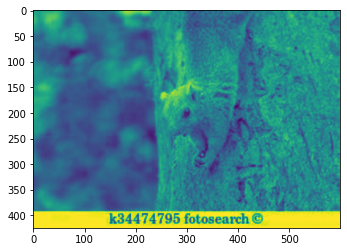

tensor([[0.4471, 0.4510, 0.4549,  ..., 0.6392, 0.6353, 0.6314],
        [0.4510, 0.4549, 0.4588,  ..., 0.6392, 0.6353, 0.6314],
        [0.4549, 0.4588, 0.4627,  ..., 0.6353, 0.6314, 0.6314],
        ...,
        [1.0000, 1.0000, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
        [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000]])
tensor(0.0118)
tensor(1.)


In [11]:
import matplotlib.pyplot as plt
i, l = next(iter(train_set_loader))
print(i.shape, i[0].shape)
sample = i[0][2]
print(sample)
plt.imshow(i[0][2].reshape(IM_HEIGHT, IM_WIDTH))
plt.show()
print(i[0][0])
print(torch.min(i[0][0]))
print(torch.max(i[0][0]))

In [13]:
dev = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
def preprocess(x, y):
    return x.to(dev), y.to(dev)
print(dev)

cpu


In [14]:
import torch.nn as nn
import torch.nn.functional as F
class someNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.l1 = nn.Linear(IM_HEIGHT*IM_WIDTH*3, 100)
        self.l2 = nn.Linear(100, 10)
        nn.init.normal_(self.l1.weight, mean=0, std=0.1)
        nn.init.normal_(self.l2.weight, mean=0, std=0.1)
    def forward(self, x):
        x = self.l1(x)
        x = F.relu(x)
        x = self.l2(x)
        x = F.log_softmax(x)
        return x

model = someNet()
model.to(dev)

someNet(
  (l1): Linear(in_features=765000, out_features=100, bias=True)
  (l2): Linear(in_features=100, out_features=10, bias=True)
)

In [15]:
WAN = False
N_EPOCH = 10
LR = 0.01

In [16]:
if WAN:
  import wandb
  wandb.init(project="animals10", entity="0xasim")
  wandb.config = {
    "learning_rate": LR,
    "epochs": N_EPOCH,
    "batch_size": BS
  }

In [17]:
from tqdm import tqdm
loss_fn = nn.CrossEntropyLoss().cuda()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
review = lambda x_b: x_b.view(len(x_b), -1)
def getValLoss():
    with torch.no_grad():
        val_loss = list()
        for x_v_b, y_v_b in tqdm(val_set_loader):
            x_v_b, y_v_b = preprocess(x_v_b, y_v_b)
            x_v_b = review(x_v_b)
            pred = model.forward(x_v_b)
            loss = loss_fn(pred, y_v_b)
            val_loss.append(loss.sum()/y_v_b.shape[0])
            print(val_loss)
        return val_loss.sum().item()

def train():
    for i in (range(N_EPOCH)):
        batch_loss = list()
        for x_b, y_b in tqdm(train_set_loader):
            x_b = review(x_b)
            x_b, y_b = preprocess(x_b, y_b)
            pred = model.forward(x_b)
            loss = loss_fn(pred, y_b)
            # clear gradients for this training step
            optimizer.zero_grad()
            # backprop, compute gradients
            loss.backward()
            # apply gradients
            optimizer.step()
            batch_loss.append(loss.sum()/y_b.shape[0])
            if WAN:
                wandb.log({"train_loss": loss.sum().item()})
        if WAN:
            wandb.log({"val_loss": getValLoss()})
train()

  0%|          | 0/4582 [00:00<?, ?it/s]/var/folders/c4/j059kg7n61q9x8b27zrclg8c0000gn/T/ipykernel_21475/3882581386.py:14: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  x = F.log_softmax(x)
  1%|▏         | 60/4582 [00:16<17:58,  4.19it/s] 

KeyboardInterrupt: 

In [ ]:
MODEL_PATH = os.path.join(os.getcwd(), N_EPOCH)
torch.save(model.state_dict(), MODEL_PATH)
print(MODEL_PATH)

In [19]:
INCOLAB = 'google.colab' in str(get_ipython()) if hasattr(__builtins__,'__IPYTHON__') else False
DOWNLOAD = False
if INCOLAB and DOWNLOAD:
    from google.colab import files
    files.download("/content/jolly-rain-12.pt_")

In [18]:
print(torch.cuda.is_available())
print(torch.cuda.device_count())
print(torch.cuda.get_device_name(0))
print(torch.cuda.get_device_properties(torch.cuda.current_device()))
print(torch.cuda.get_device_capability())
print(torch.cuda.memory_usage())

False
0


AssertionError: Torch not compiled with CUDA enabled